Importing the picture

In [ ]:
from google.colab import files
import io

uploaded = files.upload()


Saving Screenshot 2025-12-13 175936.png to Screenshot 2025-12-13 175936.png


Converting the image from BGR to RGB format

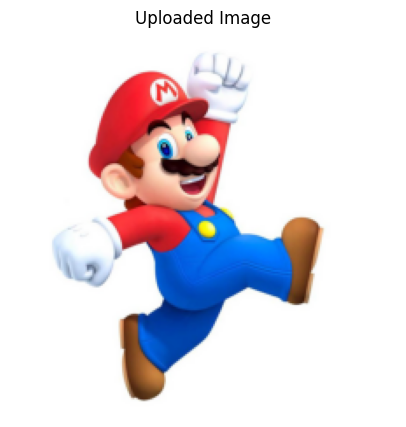

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgg= next(iter(uploaded))

img = cv2.imread(imgg)

plt.figure(figsize=(5,5))
# plt.imshow(img) # in BGR format

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.title("Uploaded Image")
plt.axis('off')
plt.show()


Grayscaling the image by cv2 inbuilt function as well as Manual (later on continuing with cv2 one)

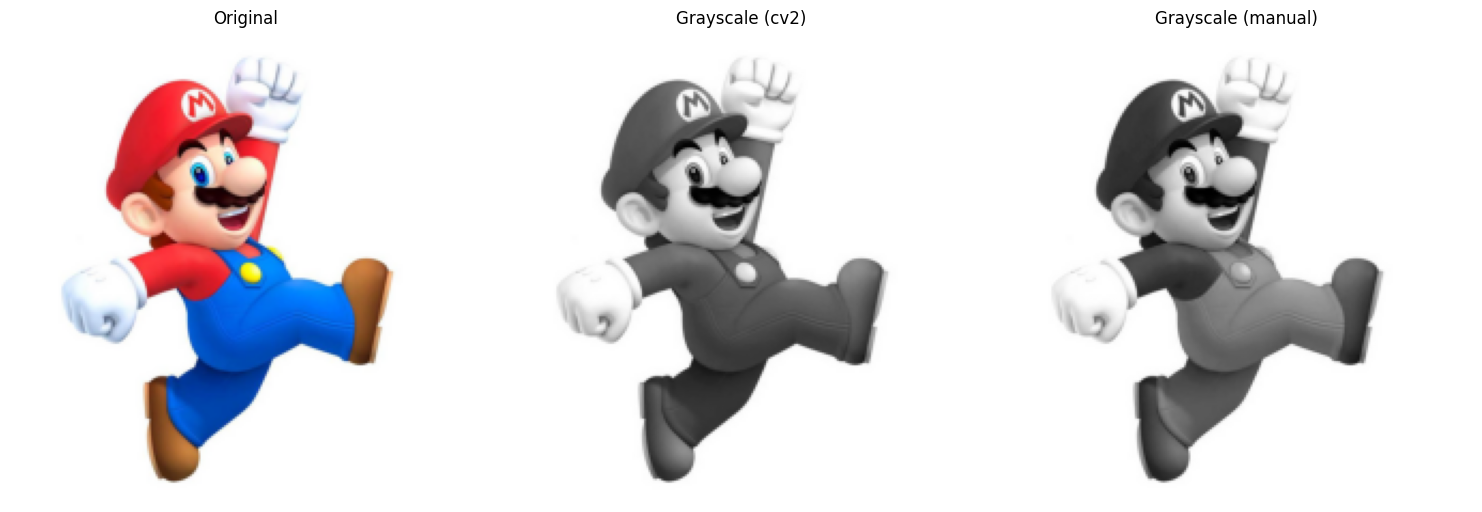

In [ ]:
gray_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_rgb = img.astype(np.float32)
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
gray_manual = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(gray_cv2, cmap='gray')
axes[1].set_title("Grayscale (cv2)")
axes[1].axis('off')

axes[2].imshow(gray_manual, cmap='gray')
axes[2].set_title("Grayscale (manual)")
axes[2].axis('off')

plt.tight_layout()
plt.show()


Normalizing the grayscale values within the range 0 to 1

Original intensity range: 7.0 → 255.0
Normalized range: 0.02745098 → 1.0


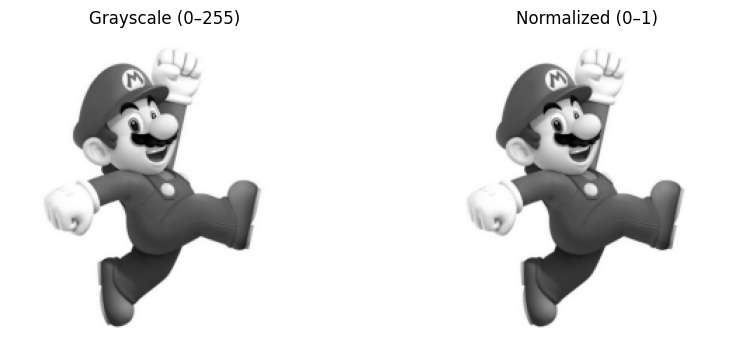

In [ ]:
gray = gray_cv2.astype(np.float32)
gray_norm = gray / 255.0

print("Original intensity range:", gray.min(), "→", gray.max())
print("Normalized range:", gray_norm.min(), "→", gray_norm.max())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale (0–255)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_norm, cmap='gray')
plt.title("Normalized (0–1)")
plt.axis('off')
plt.show()


Blurring the grayscale image by mean blur as well as gaussian blur- we ll be using gaussian one later on

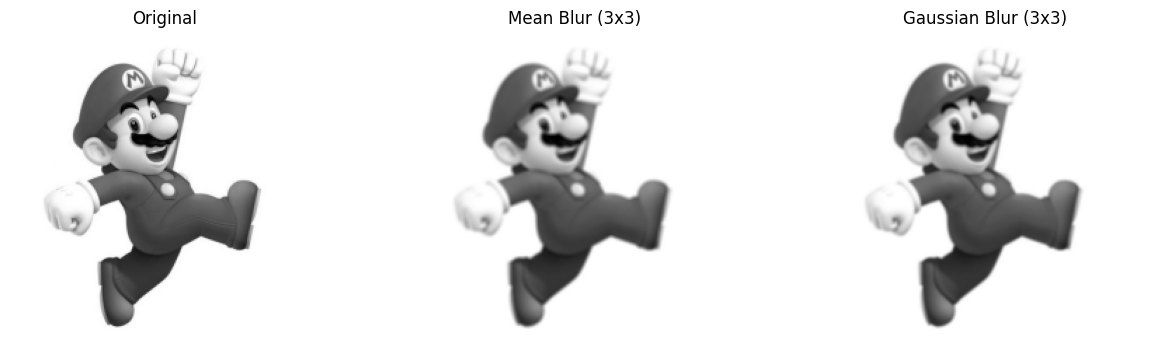

In [ ]:
blur_mean = cv2.blur(gray_norm, (3,3))
blur_gauss = cv2.GaussianBlur(gray_norm, (3,3), 0)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(blur_mean, cmap="gray")
plt.title("Mean Blur (3x3)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Gaussian Blur (3x3)")
plt.axis("off")
plt.show()


Sharpened the blurred image with motive of making edges more clear but led to noise, thus not included in further processing

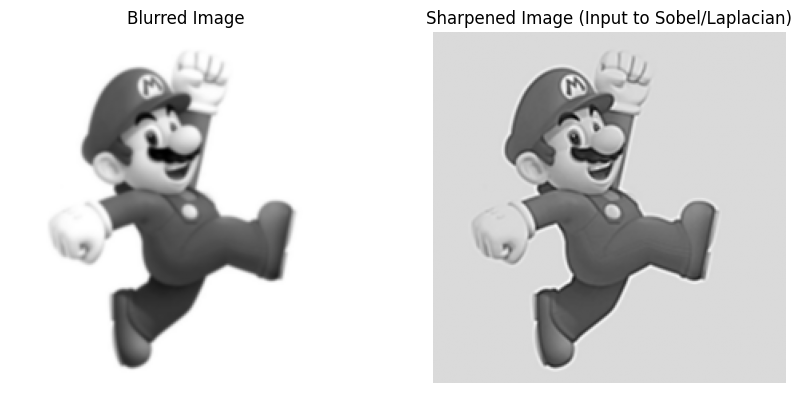

In [ ]:
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

sharpened_image = cv2.filter2D(blur_gauss, -1, sharpening_kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image (Input to Sobel/Laplacian)")
plt.axis("off")
plt.show()

Here, we apply sobel (manually created function)- to the blurred image- vertical as well as horizontal

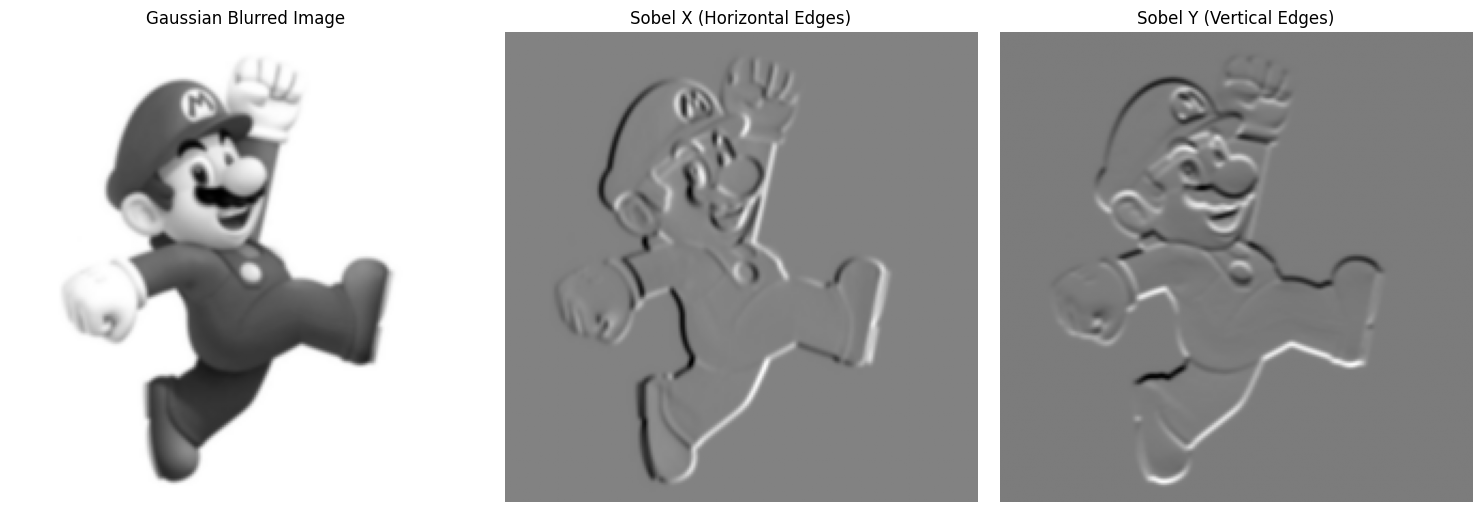

In [ ]:
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_x = cv2.filter2D(blur_gauss, -1, sobel_x_kernel)
sobel_y = cv2.filter2D(blur_gauss, -1, sobel_y_kernel)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap="gray")
plt.title("Sobel X (Horizontal Edges)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap="gray")
plt.title("Sobel Y (Vertical Edges)")
plt.axis("off")

plt.tight_layout()
plt.show()

we find the euclidean distance of the 2 sobel magnitudes

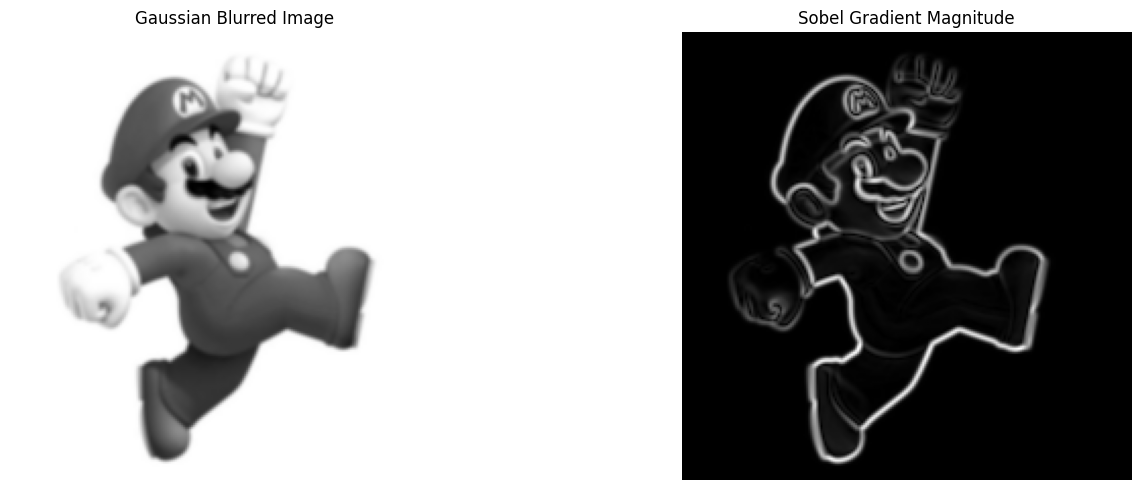

In [ ]:
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap="gray")
plt.title("Sobel Gradient Magnitude")
plt.axis("off")

plt.tight_layout()
plt.show()

This is the Laplacian operation

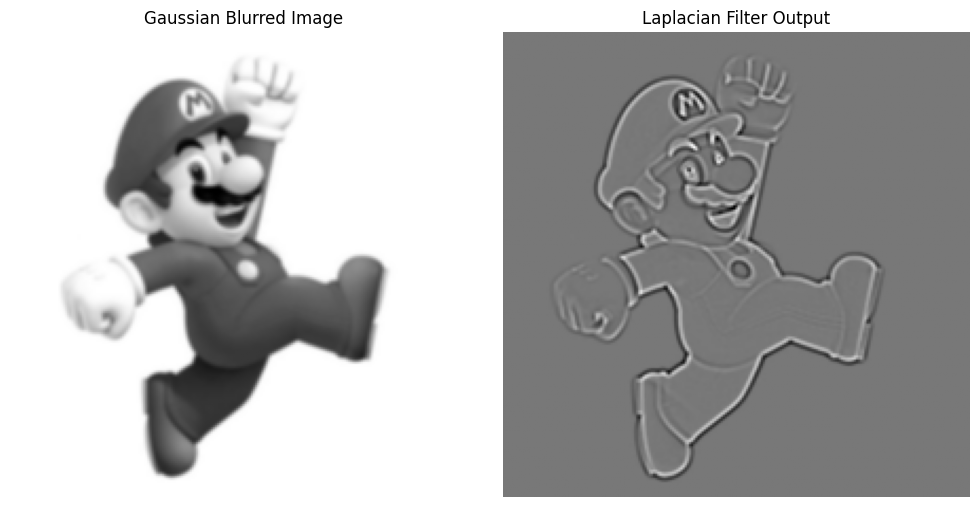

In [ ]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

laplacian_output = cv2.filter2D(blur_gauss, -1, laplacian_kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(laplacian_output, cmap="gray")
plt.title("Laplacian Filter Output")
plt.axis("off")

plt.tight_layout()
plt.show()

Here both are normalized and thresholds are set for both sobel and laplacian by trial and error

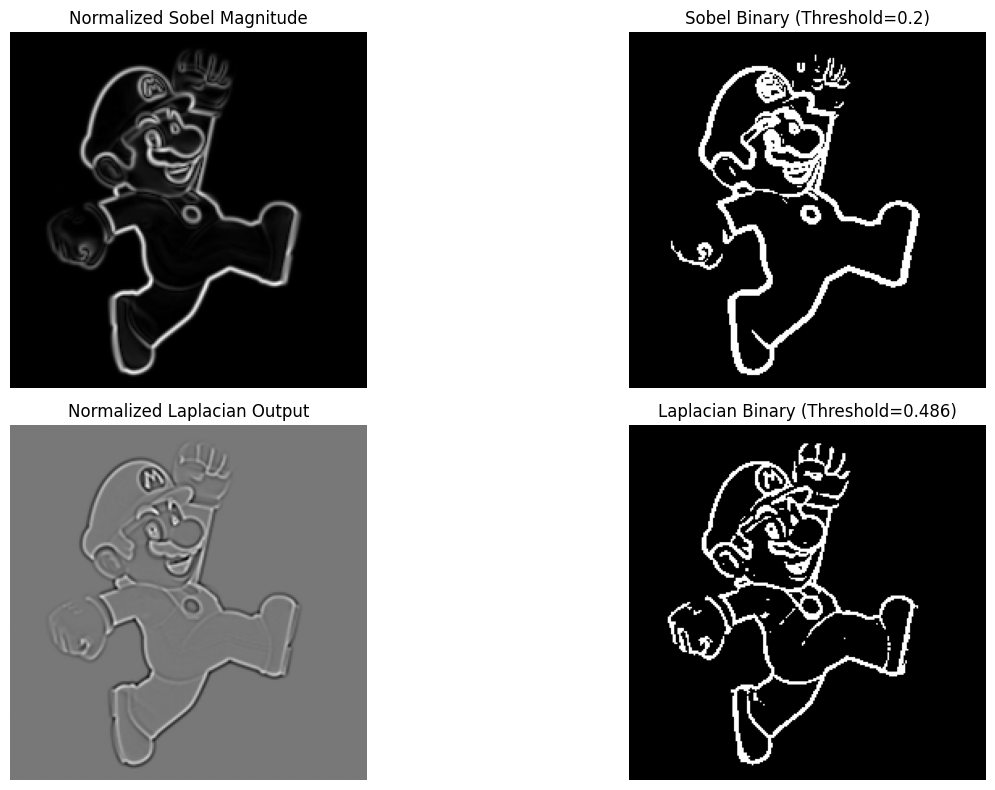

In [211]:
sobel_norm = cv2.normalize(sobel_magnitude, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
laplacian_norm = cv2.normalize(laplacian_output, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)

sobel_thresh_val = 0.2
laplacian_thresh_val = 0.486

_, sobel_binary = cv2.threshold(sobel_norm, sobel_thresh_val, 1, cv2.THRESH_BINARY)
_, laplacian_binary = cv2.threshold(laplacian_norm, laplacian_thresh_val, 1, cv2.THRESH_BINARY)

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(sobel_norm, cmap="gray")
plt.title("Normalized Sobel Magnitude")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sobel_binary, cmap="gray")
plt.title(f"Sobel Binary (Threshold={sobel_thresh_val})")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(laplacian_norm, cmap="gray")
plt.title("Normalized Laplacian Output")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(laplacian_binary, cmap="gray")
plt.title(f"Laplacian Binary (Threshold={laplacian_thresh_val})")
plt.axis("off")

plt.tight_layout()
plt.show()

The various images during the whole processing

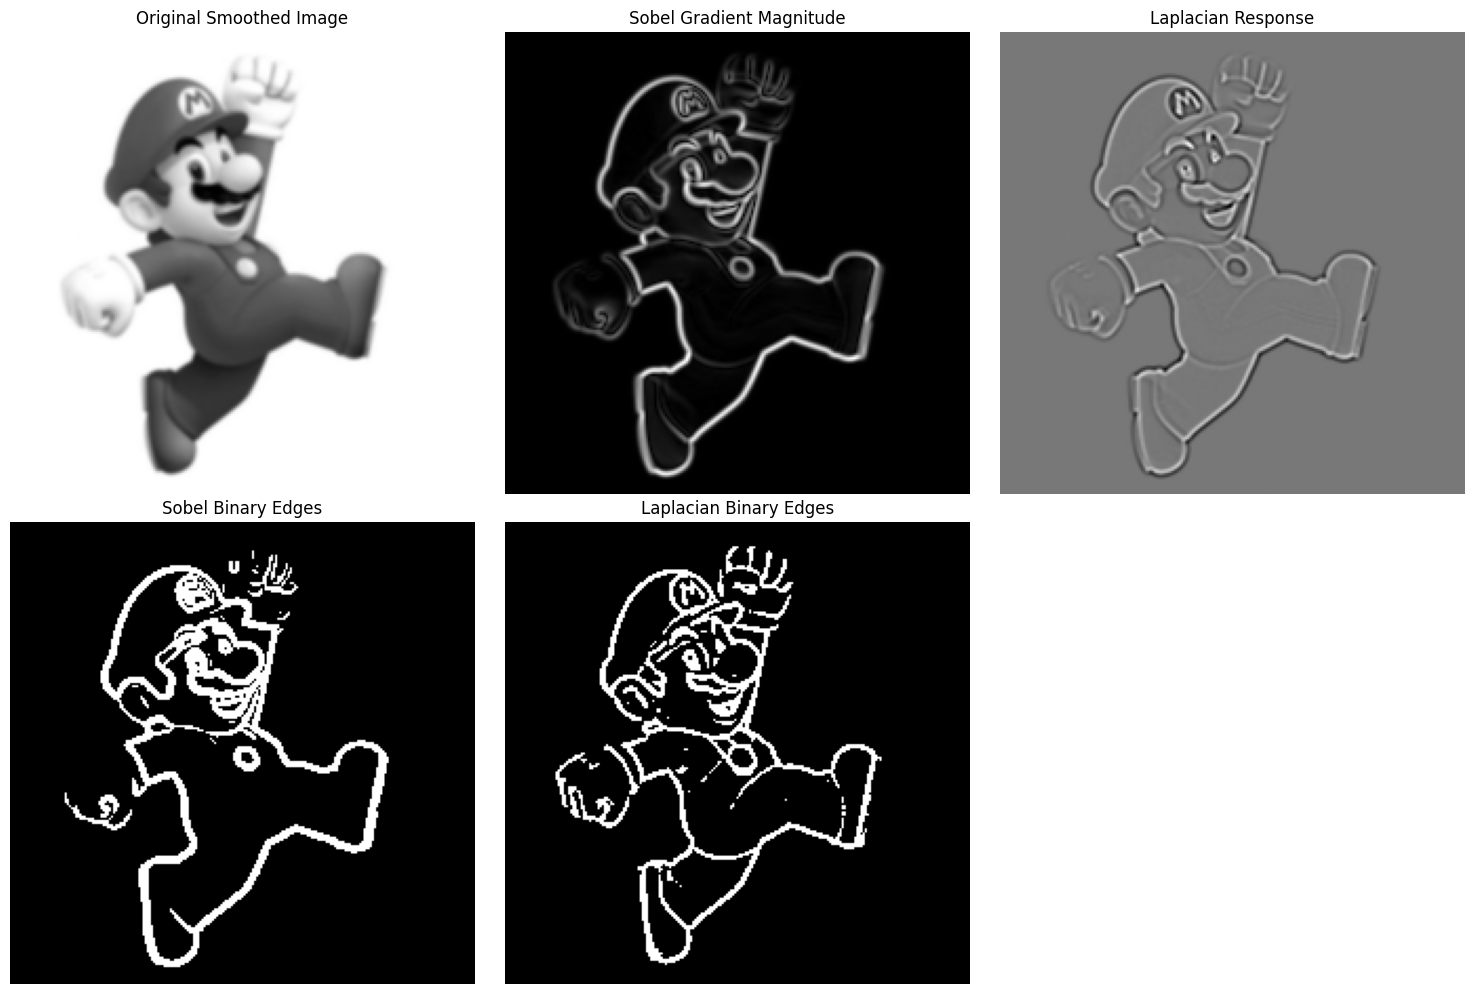

In [212]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Original Smoothed Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(sobel_magnitude, cmap="gray")
plt.title("Sobel Gradient Magnitude")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(laplacian_output, cmap="gray")
plt.title("Laplacian Response")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(sobel_binary, cmap="gray")
plt.title("Sobel Binary Edges")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(laplacian_binary, cmap="gray")
plt.title("Laplacian Binary Edges")
plt.axis("off")

plt.tight_layout()
plt.show()

Final edges which are detected by Laplacian.

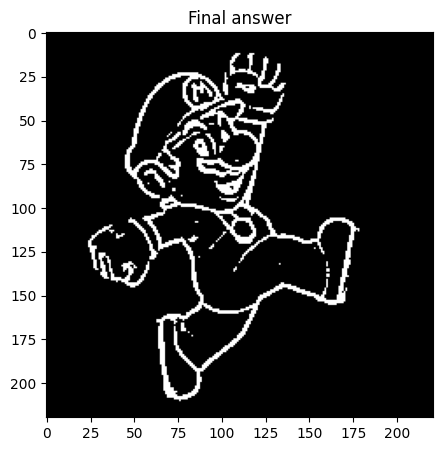

In [213]:
plt.figure(figsize=(5, 5))
plt.imshow(laplacian_binary, cmap="gray")
plt.title("Final answer")
plt.show()

The final output isnt as fine and accurate as in the problem statement doc, did various things here and there to optimize but couldnt do better than this.
Thus it would be great if the expected solution file could be shared so that we can see what was missed, Thankyou!!